<a href="https://colab.research.google.com/github/dincbariscagri/cng562/blob/master/Din%C3%A7_Aerial_Cactus_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Data Download From Kaggle




In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

User Kaggle API Upload Required.

In [32]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dincbariscagri","key":"4f5bc4e9a909993dbfa5e71d78faa089"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [39]:
!kaggle competitions download -c aerial-cactus-identification
!ls

  0% 0.00/667k [00:00<?, ?B/s]
100% 667k/667k [00:00<00:00, 45.4MB/s]
  0% 0.00/160k [00:00<?, ?B/s]
100% 160k/160k [00:00<00:00, 45.9MB/s]
  0% 0.00/4.20M [00:00<?, ?B/s]
100% 4.20M/4.20M [00:00<00:00, 68.5MB/s]
 47% 9.00M/19.2M [00:00<00:00, 24.7MB/s]
100% 19.2M/19.2M [00:00<00:00, 39.0MB/s]
sample_submission.csv  test.zip  train.csv  train.zip


In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import os


In [41]:
os.getcwd()

'/content'

In [0]:
!unzip train.zip

## Data Preprocessing

In [0]:
train = pd.read_csv('train.csv')

In [44]:
from tqdm import tqdm
from keras.preprocessing import image
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['id'][i], target_size=(28,28,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

Using TensorFlow backend.
100%|██████████| 17500/17500 [00:06<00:00, 2709.38it/s]


In [0]:
y=train['has_cactus'].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## CNN Models Called

In [0]:
#CNN import
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from keras import regularizers

In [0]:
#Initialize
classifier = Sequential()

In [49]:
#Conv.
classifier.add(Conv2D(32,(3,3),input_shape=(28,28,3),activation='relu',kernel_regularizer=regularizers.l1(0.01)))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:

classifier.add(MaxPooling2D(pool_size=(2,2)))

In [51]:
classifier.add(Dropout(0.4))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:

classifier.add(Flatten())

In [0]:
#Full Connection
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(1, activation='sigmoid'))

In [0]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model fitted with 15 epochs. Different layer combinations tried.

In [61]:
history = classifier.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Train on 14000 samples, validate on 3500 samples
Epoch 1/15
14000/14000 [==============================] - 49s 3ms/step - loss: 0.1293 - acc: 0.9669 - val_loss: 0.1156 - val_acc: 0.9763
Epoch 2/15
14000/14000 [==============================] - 49s 4ms/step - loss: 0.1386 - acc: 0.9635 - val_loss: 0.1209 - val_acc: 0.9746
Epoch 3/15
14000/14000 [==============================] - 49s 4ms/step - loss: 0.1391 - acc: 0.9651 - val_loss: 0.1200 - val_acc: 0.9751
Epoch 4/15
14000/14000 [==============================] - 49s 4ms/step - loss: 0.1348 - acc: 0.9637 - val_loss: 0.1633 - val_acc: 0.9586
Epoch 5/15
14000/14000 [==============================] - 50s 4ms/step - loss: 0.1328 - acc: 0.9648 - val_loss: 0.1169 - val_acc: 0.9726
Epoch 6/15
14000/14000 [==============================] - 51s 4ms/step - loss: 0.1495 - acc: 0.9593 - val_loss: 0.1167 - val_acc: 0.9743
Epoch 7/15
14000/14000 [==============================] - 50s 4ms/step - loss: 0.1271 - acc: 0.9663 - val_loss: 0.1158 - val_acc:

In [62]:
classifier.evaluate(X_train,y_train,steps=100)

100/100 [==============================] - 379s 4s/step


[0.08634535223245621, 0.9842857122421265]

## Graphs

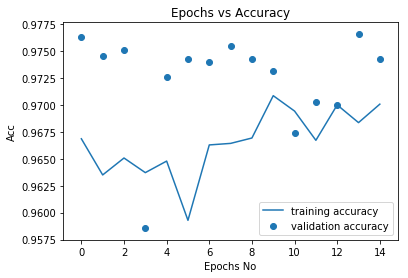

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,15)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('Epochs No')
plt.ylabel('Acc')

acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("Epochs vs Accuracy")
plt.legend()

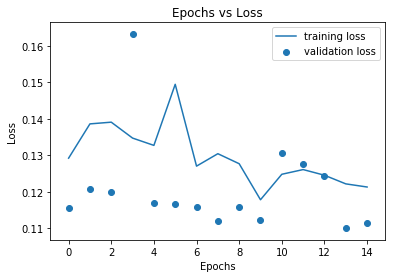

In [65]:
acc=history.history['loss']    ##getting  loss of each epochs
epochs_=range(0,15)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('Epochs vs Loss')
plt.legend()

## Transfer Learning (Use with GPU not TPU)

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from keras.layers import Dropout,Dense,Flatten
from keras import optimizers

model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))

for layer in model_resnet50.layers:   
    layer.trainable = False    #dont set it to false if you want all layers of ResNeT50 to be trained
    
model = Sequential()
model.add(model_resnet50)
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1,activation = 'sigmoid'))

opt = optimizers.Adam(lr=0.0001)
model.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ["accuracy"])

from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [0]:
history = model.fit_generator(train_set, steps_per_epoch=22046, epochs=25, validation_data=test_set, validation_steps=5512, callbacks=[learning_rate_reduction])

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step


### TL Graphs

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,25)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("epochs vs accuracy")
plt.legend()

In [0]:
acc=history.history['loss']    ##getting  loss of each epochs
epochs_=range(0,25)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('epochs vs loss')
plt.legend()